In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [13]:
ds = pd.read_csv('RingsCross.txt')
ds

,Sex,HasSex,SexM,SexF,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings,Predicted Rings,Residual Rings,Studentized Resid Rings
0,M,1,1,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,9.115917,5.884083,2.848511
1,M,1,1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,7.824097,-0.824097,-0.398399
2,F,1,0,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,11.460884,-2.460884,-1.188943
3,M,1,1,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,9.732532,0.267468,0.129337
4,I,0,0,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,6.541081,0.458919,0.221647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172,F,1,0,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,10.677765,0.322235,0.155775
4173,M,1,1,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,9.813782,0.186218,0.089999
4174,M,1,1,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.601094,-1.601094,-0.775701
4175,F,1,0,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,9.365028,0.634972,0.306947


In [14]:
color_dict = sns.color_palette()
color_dict

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

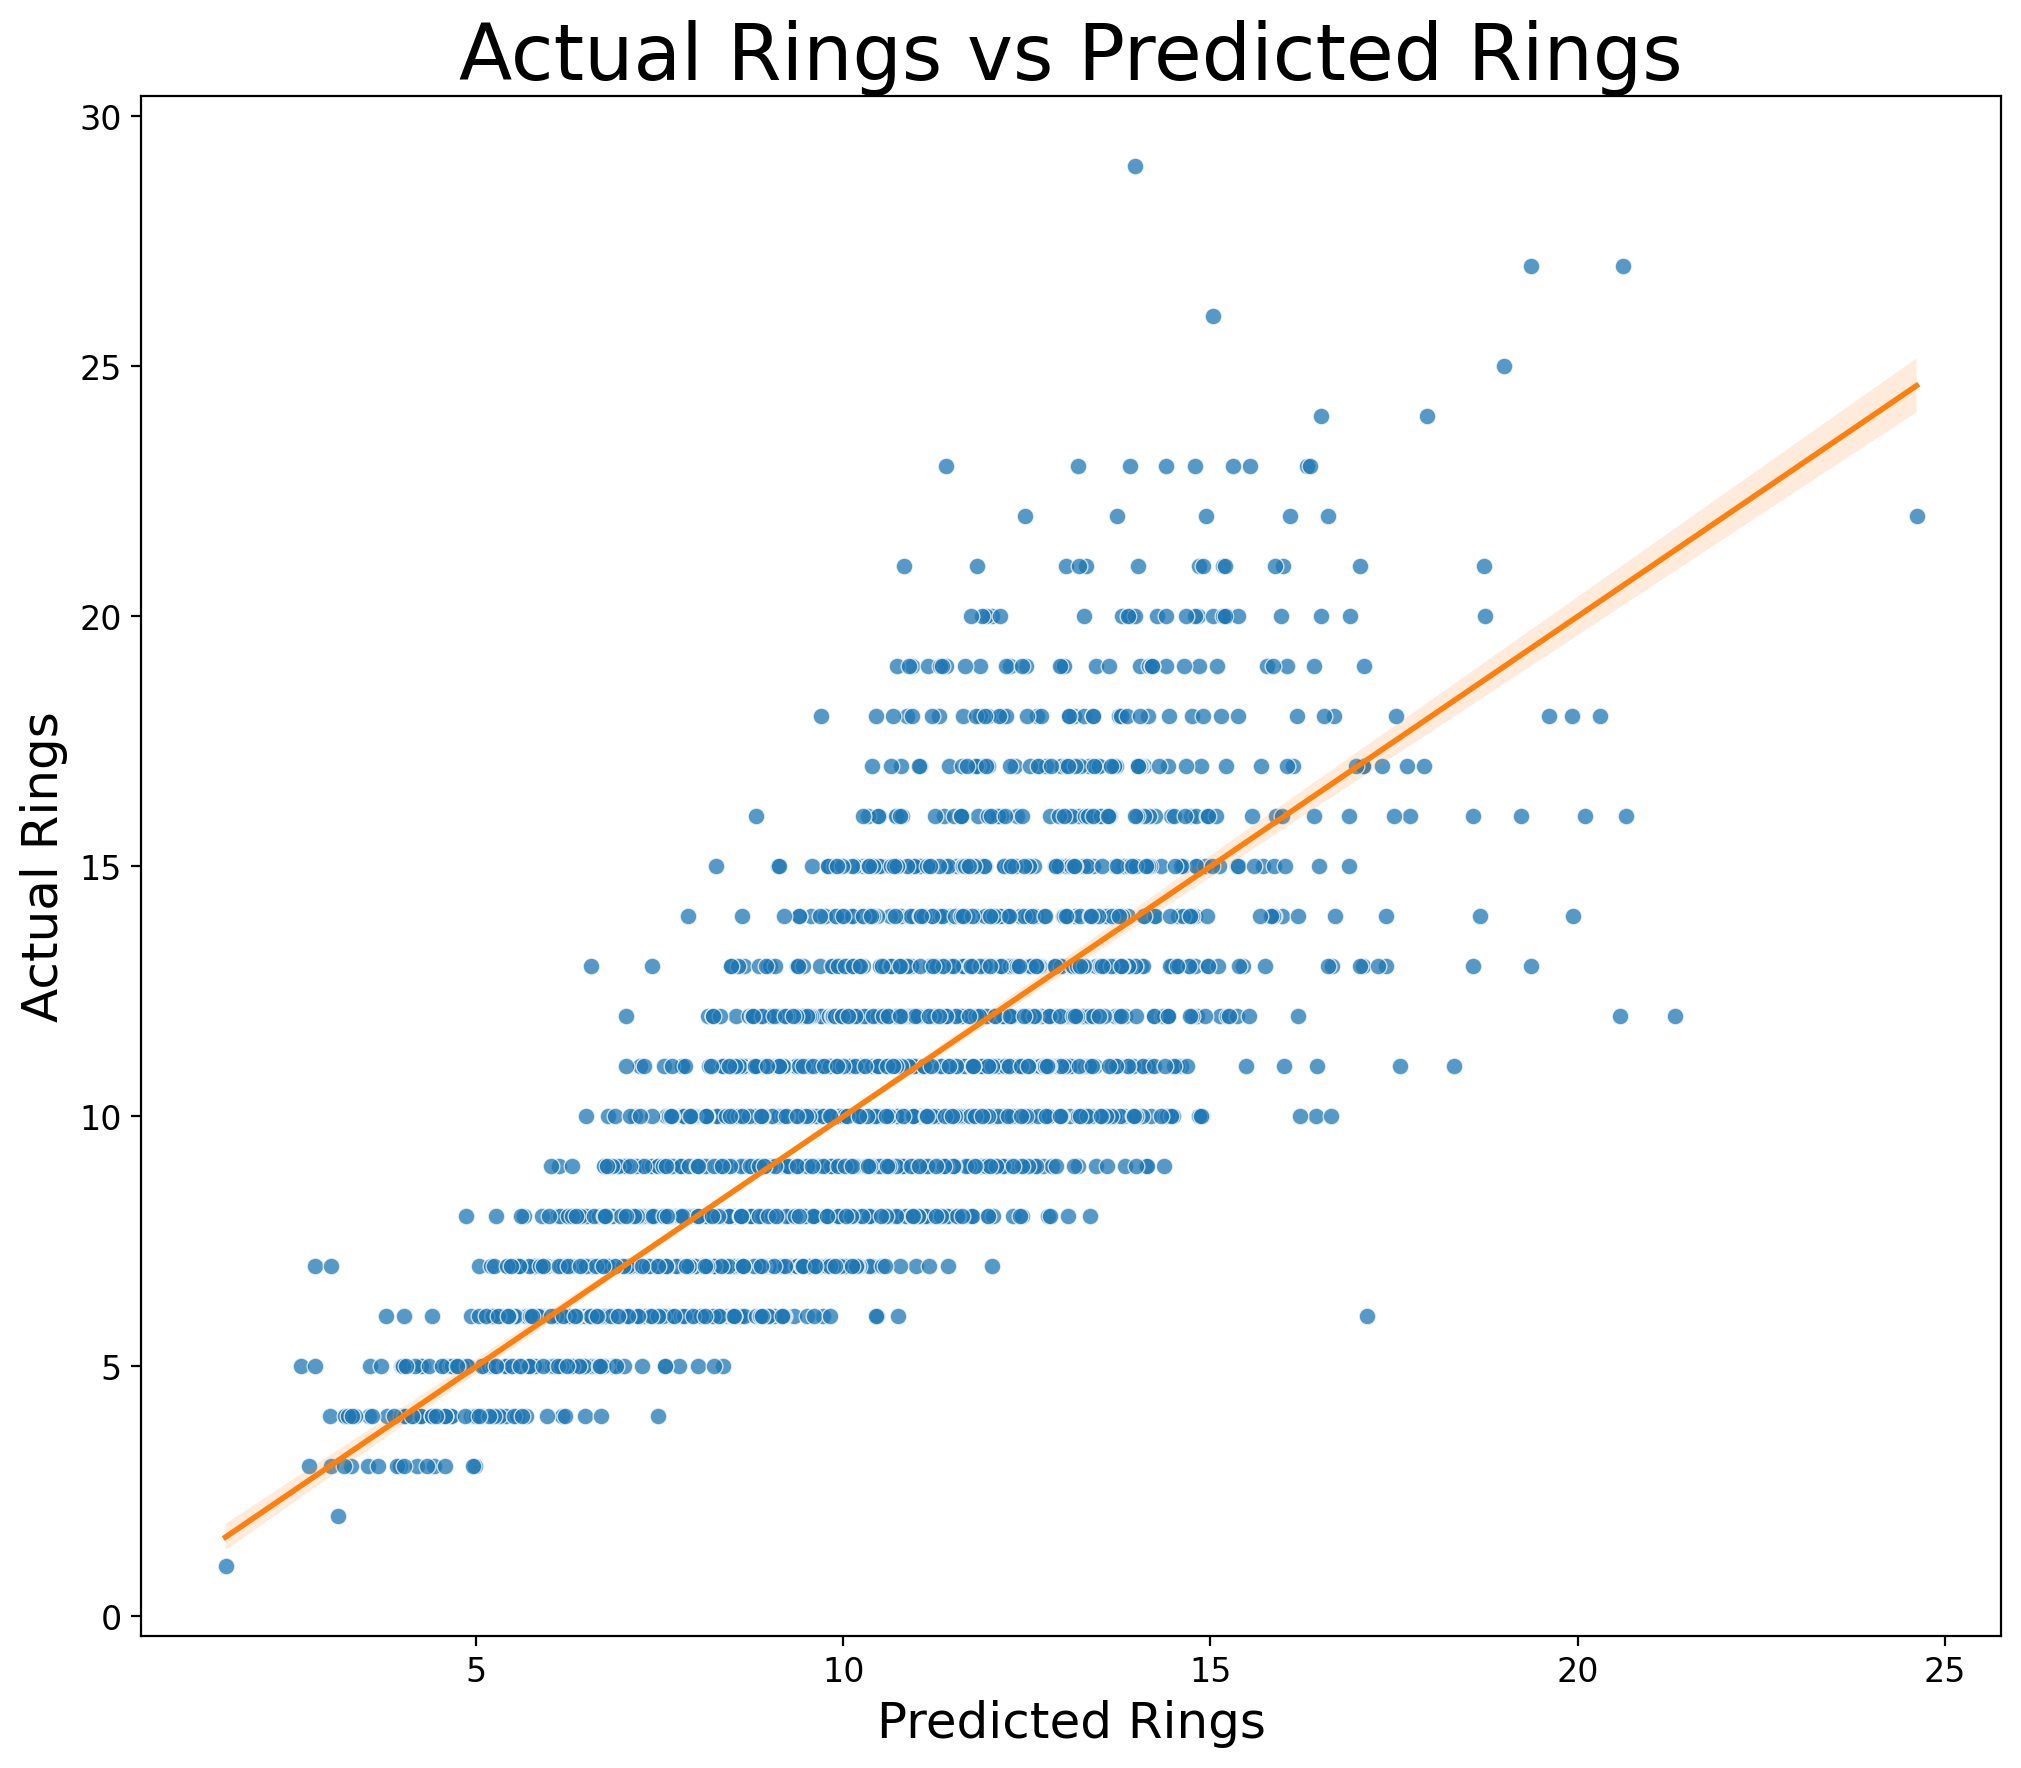

In [15]:
plt.figure(figsize=(12, 10), dpi=200)

sns.scatterplot(x='Predicted Rings', y='Rings', data=ds, alpha=0.75)
sns.regplot(x='Predicted Rings', y='Rings', data=ds, scatter=False, line_kws={'linewidth': 2}, color = color_dict[1])

plt.title('Actual Rings vs Predicted Rings', fontdict={'fontsize': 28})
plt.xlabel('Predicted Rings', fontdict={'fontsize': 18})
plt.ylabel('Actual Rings', fontdict={'fontsize': 18})
plt.tick_params(axis='both', which='major', labelsize=12)

plt.savefig('plots/actual_vs_predicted_rings.png')

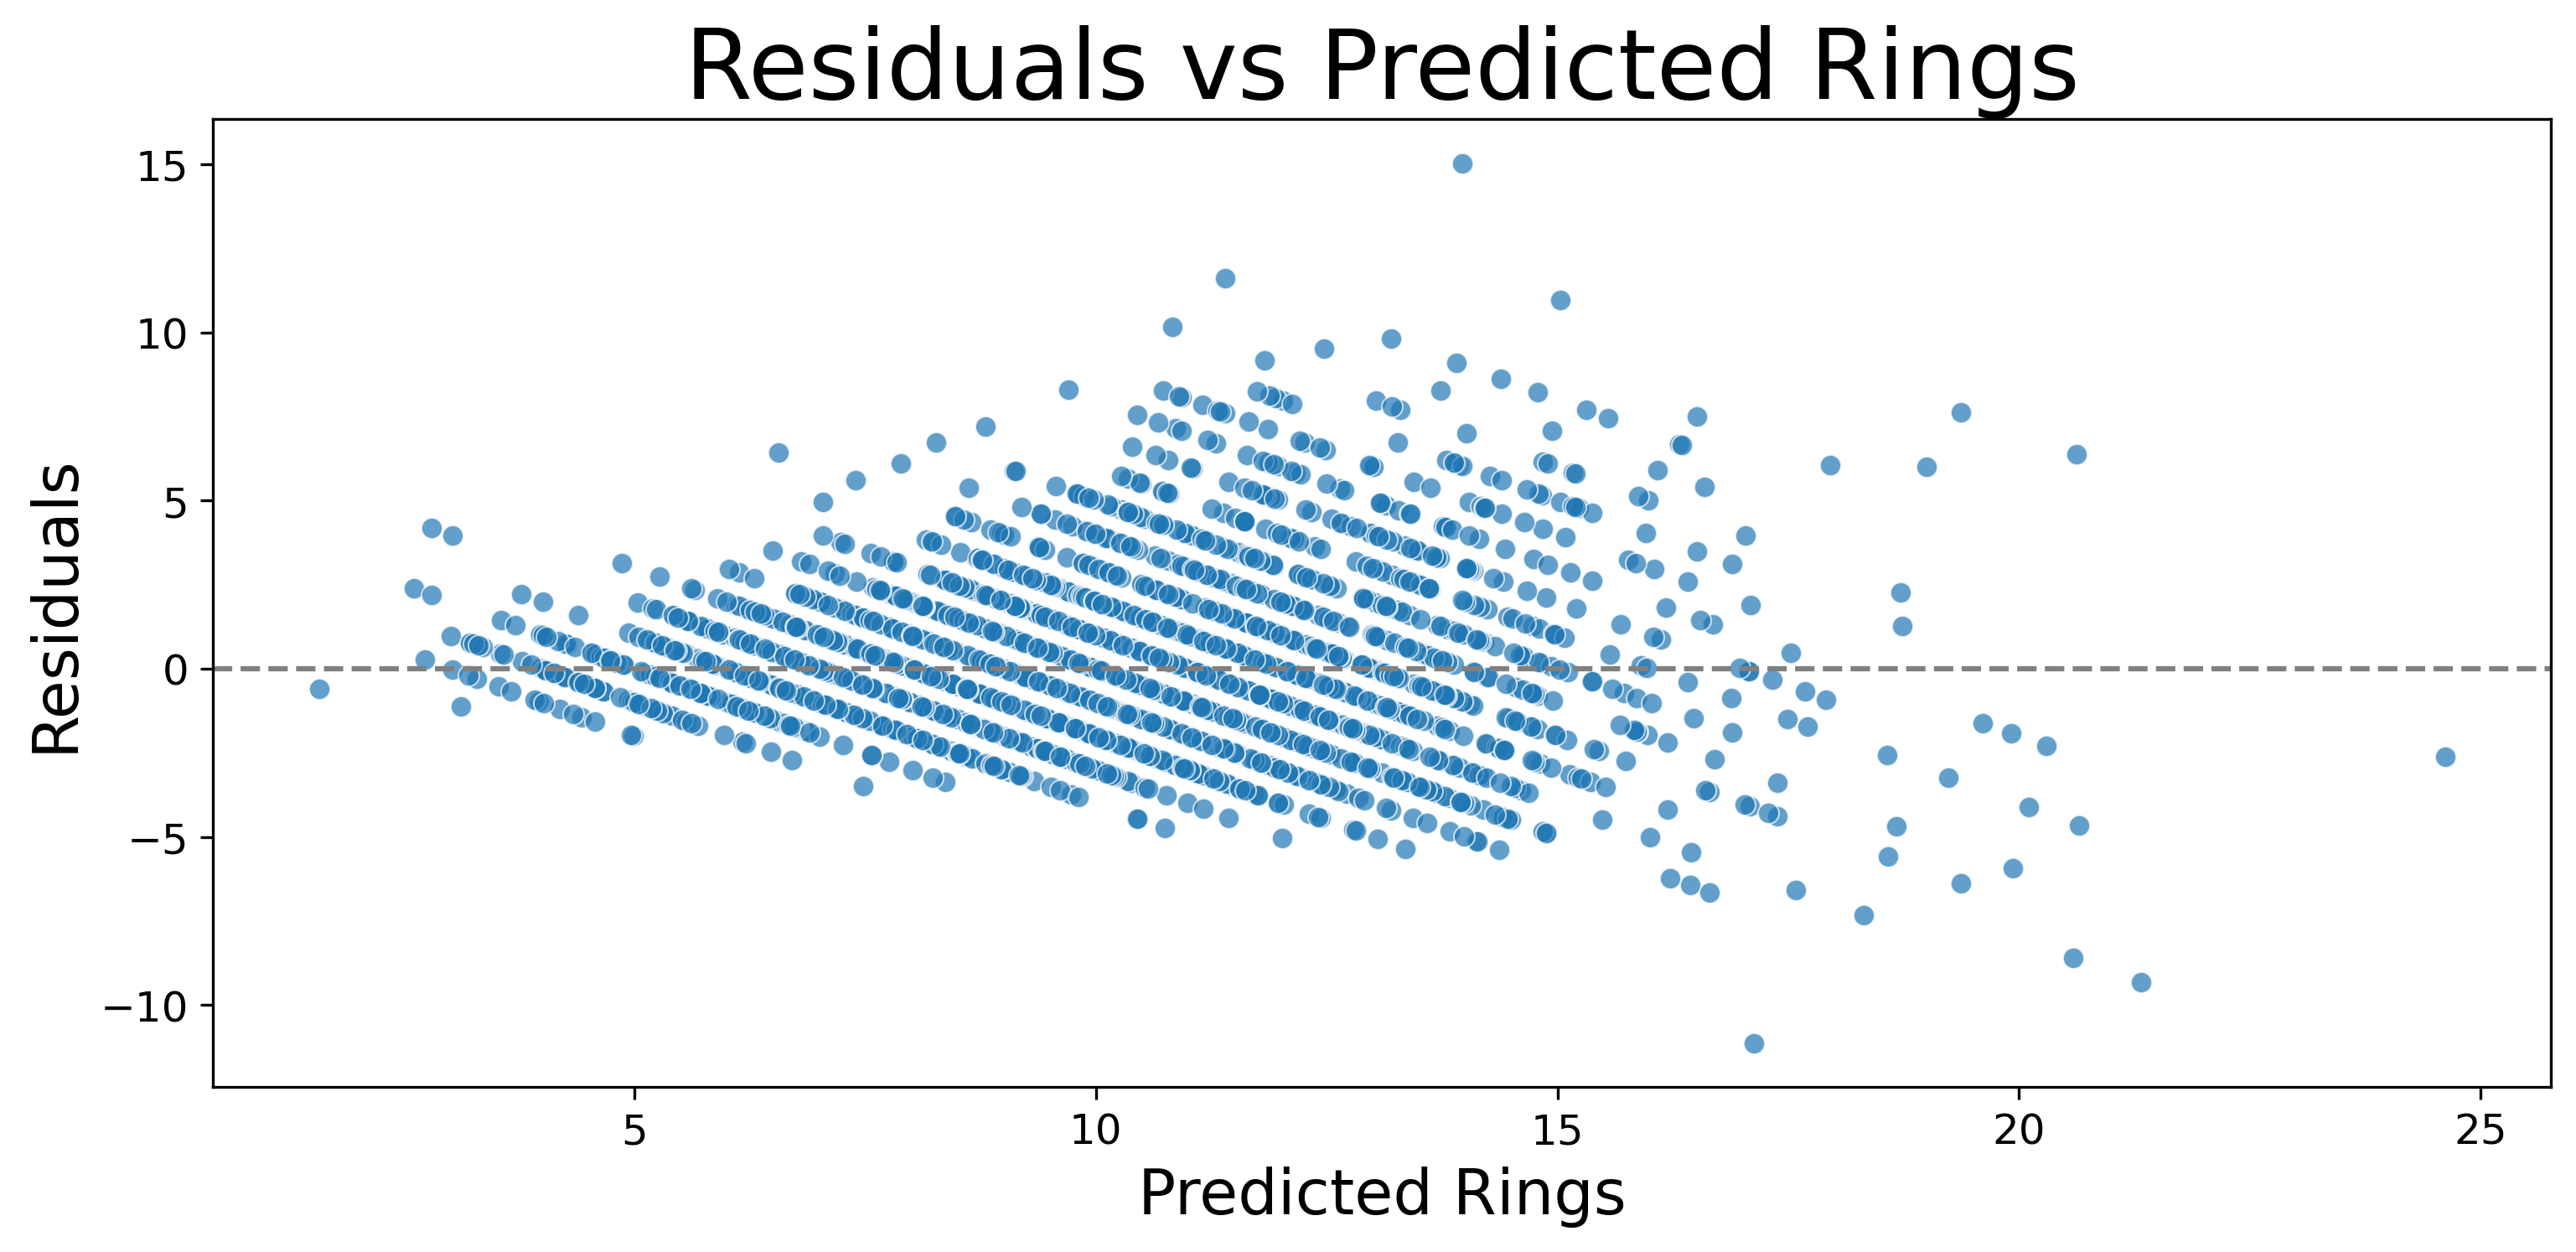

In [16]:
plt.figure(figsize=(12, 5), dpi=300)

sns.scatterplot(x='Predicted Rings', y='Residual Rings', data=ds, alpha = 0.7, color = color_dict[0])
plt.axhline(0, color='grey', linestyle='--')

plt.title('Residuals vs Predicted Rings', fontdict={'fontsize': 28})
plt.xlabel('Predicted Rings', fontdict={'fontsize': 18})
plt.ylabel('Residuals', fontdict={'fontsize': 18})
plt.tick_params(axis='both', which='major', labelsize=12)

plt.savefig('plots/residuals_vs_predicted_rings.png')

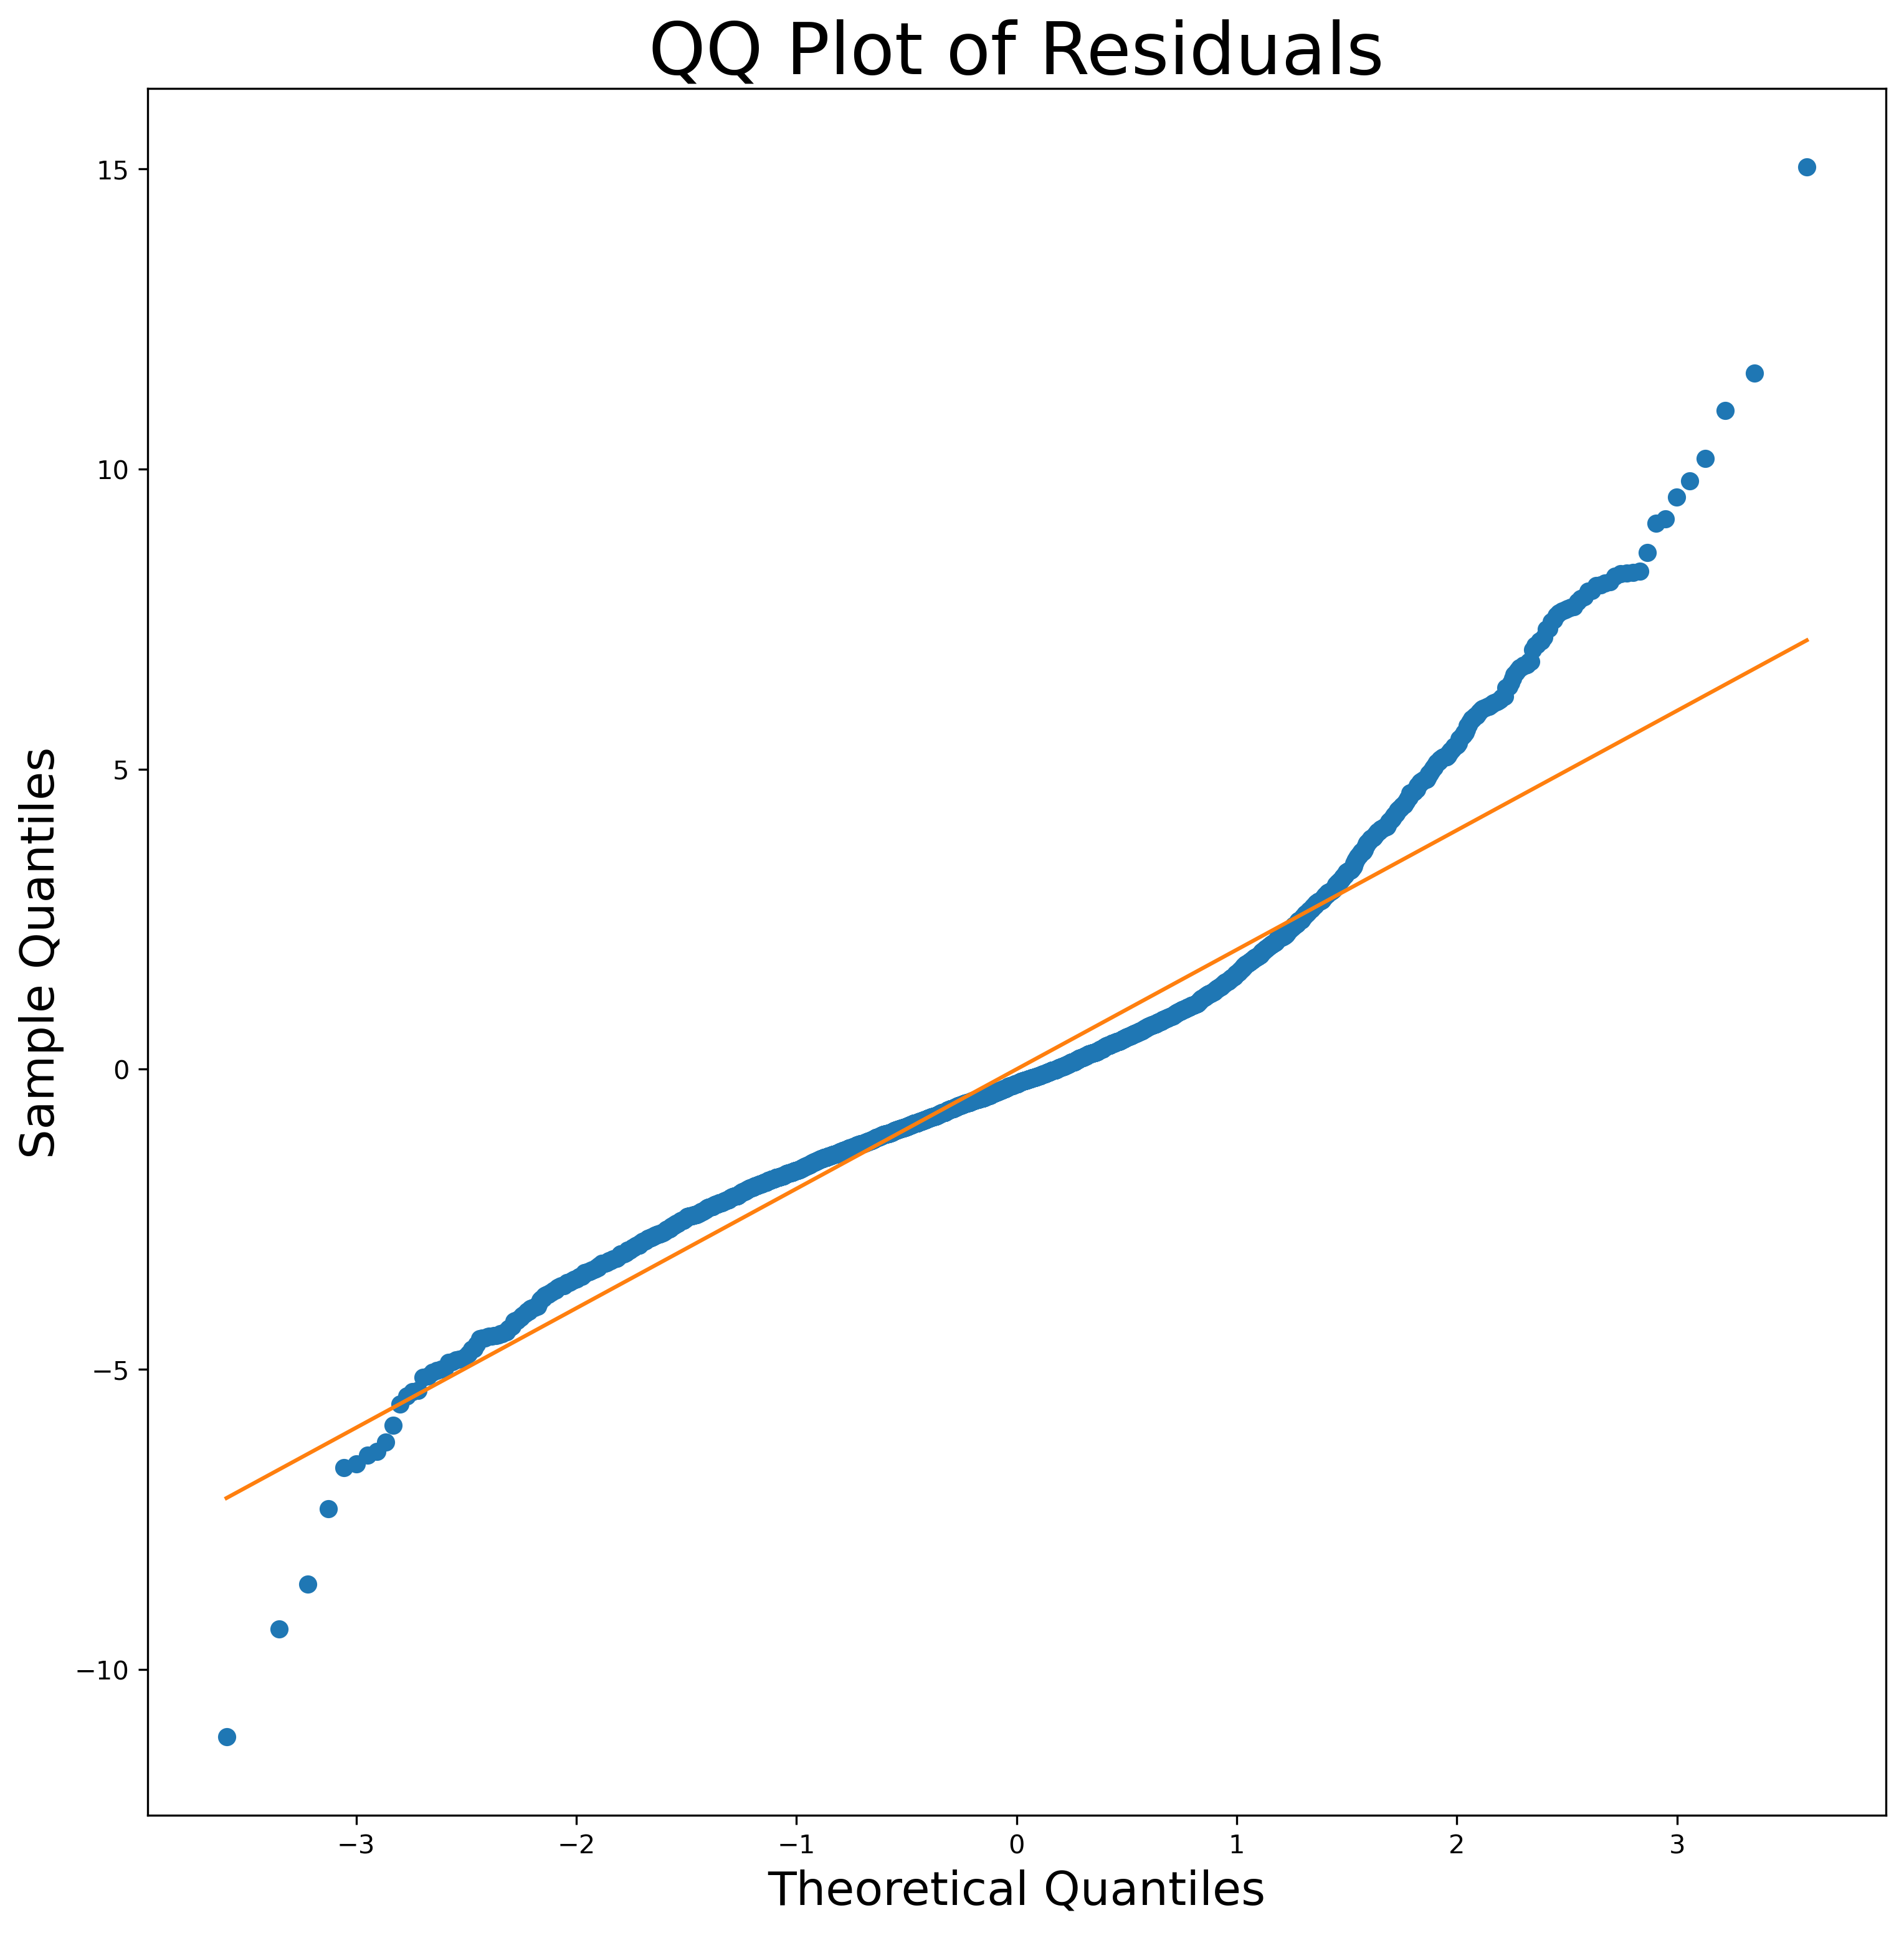

In [17]:
fig = plt.figure(figsize=(12, 12), dpi=300)
ax = fig.add_subplot(111)

res = stats.probplot(ds['Residual Rings'], dist="norm", plot=ax)

ax.get_lines()[0].set_markerfacecolor(color_dict[0])
ax.get_lines()[0].set_markeredgecolor(color_dict[0])
ax.get_lines()[1].set_color(color_dict[1])

plt.title('QQ Plot of Residuals', fontdict={'fontsize': 28})
plt.xlabel('Theoretical Quantiles', fontdict={'fontsize': 18})
plt.ylabel('Sample Quantiles', fontdict={'fontsize': 18})

plt.savefig('plots/qq_plot_residuals.png')

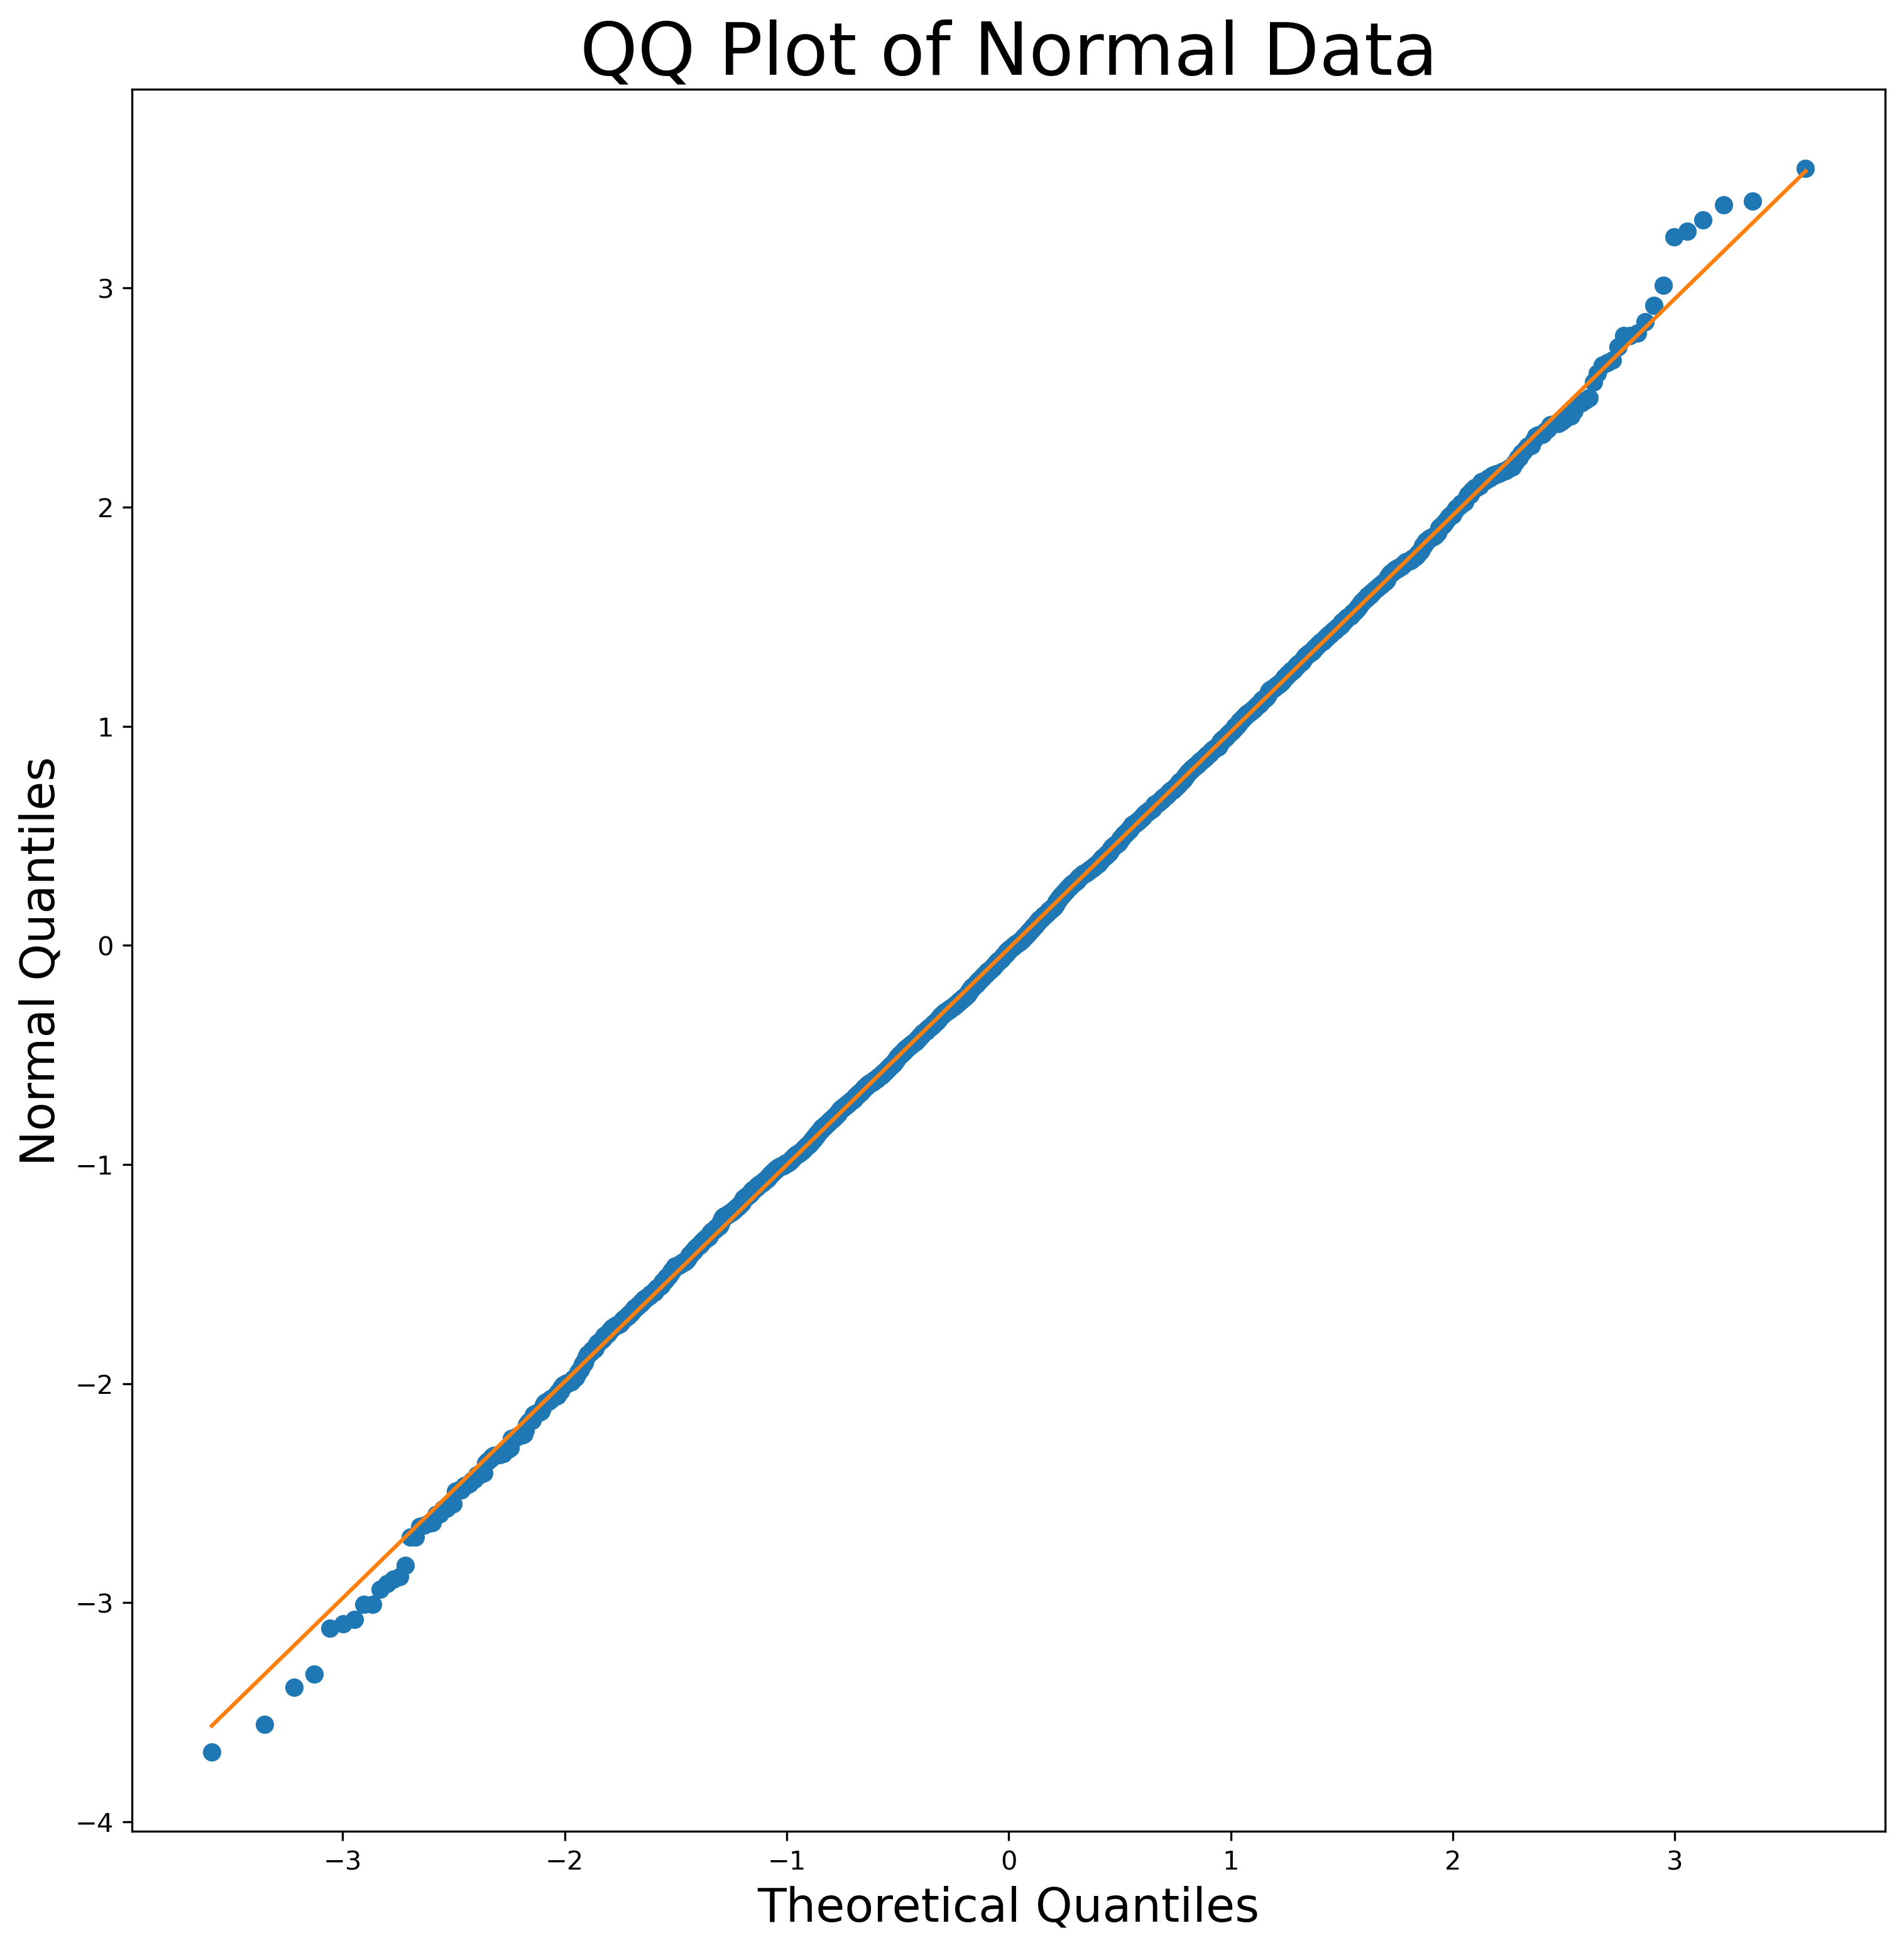

In [18]:
fig = plt.figure(figsize=(12, 12), dpi=300)
ax = fig.add_subplot(111)

dummy_data = np.random.normal(loc=0, scale=1, size=4177)
res = stats.probplot(dummy_data, dist="norm", plot=plt)

ax.get_lines()[0].set_markerfacecolor(color_dict[0])
ax.get_lines()[0].set_markeredgecolor(color_dict[0])
ax.get_lines()[1].set_color(color_dict[1])

plt.title('QQ Plot of Normal Data', fontdict={'fontsize': 28})
plt.xlabel('Theoretical Quantiles', fontdict={'fontsize': 18})
plt.ylabel('Normal Quantiles', fontdict={'fontsize': 18})

plt.savefig('plots/qq_plot_normal_data.png')